In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for Brazil Data Analyst roles

In [9]:
df_DA_Brazil = df[(df['job_country'] == 'Brazil') & (df['job_title_short'] == 'Data Analyst')]

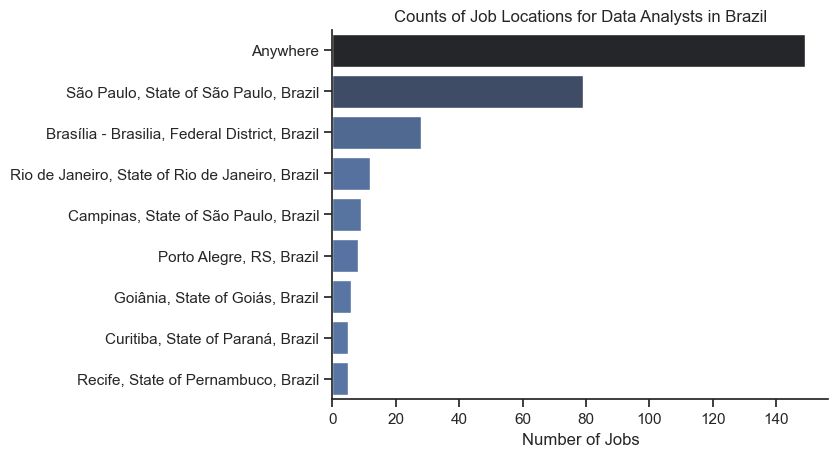

In [23]:
df_plot = df_DA_Brazil['job_location'].value_counts().head(10).to_frame()
df_plot = df_plot.drop('Brazil')

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in Brazil')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

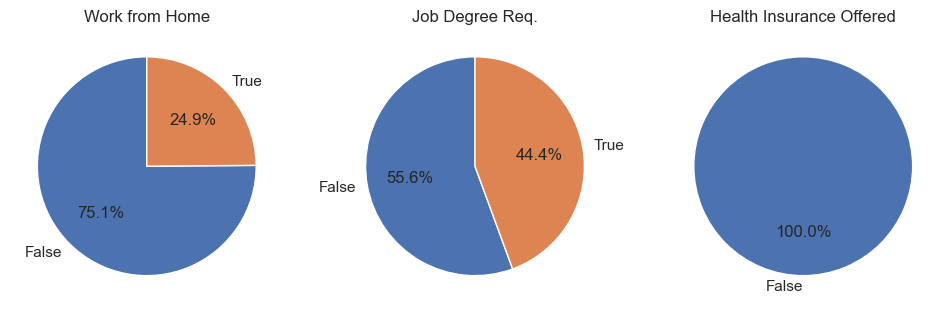

In [35]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_Brazil[column].value_counts().sort_index()
    labels = [str(val) for val in value_counts.index]

    ax[i].pie(df_DA_Brazil[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)

plt.show()

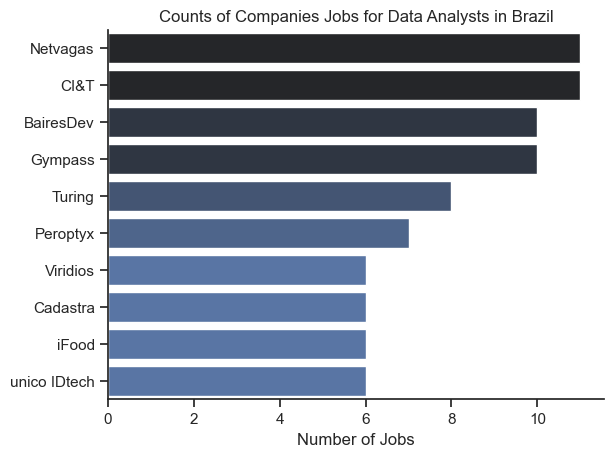

In [36]:
df_plot = df_DA_Brazil['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies Jobs for Data Analysts in Brazil')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()